## Exploring Neural Nets in Keras

I recently saw a popular github repo provided a new set of images to practice small ML algorithms on: https://github.com/zalandoresearch/fashion-mnist#get-the-data and thought I'd take a peak. 

Its a new take on the original MNIST dataset. There is some opinion that Mnist is too simple/easy to produce very high accuracy results however it is a great beginner tool since its a manageable size. Having a more challenging yet managebale dataset available is great for all!

---

### Goals

I plan to explore a few basic architectures to learn how to construct and train models in keras. I'll do this for both datasets since I think it will be revealing how they perform from one dataset to the next.

1. 1 layer NN
2. multi layer NN
3. ConvNN

In [408]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, BatchNormalization, Flatten
from keras.utils import to_categorical
from keras.optimizers import SGD, Adam
from keras import regularizers

from sklearn.model_selection import train_test_split

%matplotlib inline

### Intro to the dataset

---

There are 60k train and 10k test images distributed across 10 classes. Each class in the train set has exactly 6k examples. The classes are: 

    tshirt, 
    pants, 
    pullover,
    dress,
    coat,
    sandal,
    shirt,
    sneaker,
    bag,
    ankle boot
    
Each image is 28x28 meaning we will have an input of 784 features in any model we use. Of course the shape will depend on the type of NN we use.

In [410]:
train = pd.read_csv('../../fashionmnist/fashion-mnist_train.csv')
test = pd.read_csv('../../fashionmnist/fashion-mnist_test.csv')

In [411]:
X_train = np.array(train.drop('label',axis=1))
y_train = np.array(train['label'])
X_test = np.array(test.drop('label',axis=1))
y_test = np.array(test['label'])

In [412]:
# X_train = pd.DataFrame(data.train.images)
# y_train = pd.DataFrame(data.train.labels)
# y_train.columns = ['label']
# X_test = pd.DataFrame(data.test.images)
# y_test = pd.DataFrame(data.test.labels)

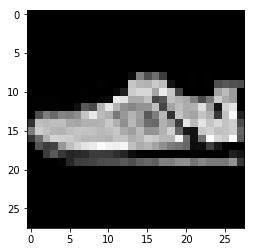

In [413]:
plt.imshow(X_train[28].reshape(28,28),cmap='gray')

In [414]:
train['label'].value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

In [415]:
label_examples = pd.DataFrame()
for i in range(0,10):
    label_example = train[train['label'] == i].head(1)
    label_examples = pd.concat([label_examples,label_example],axis=0) 
    
label_examples = label_examples.set_index('label')

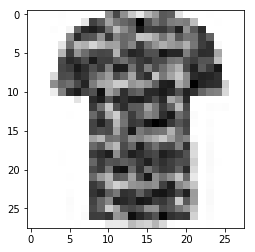

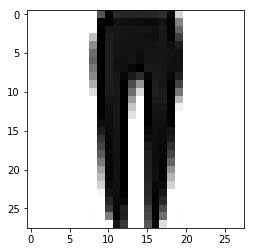

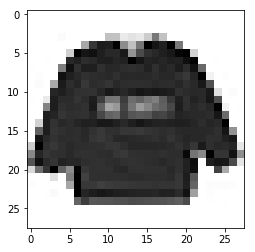

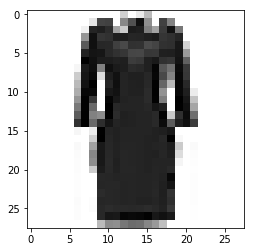

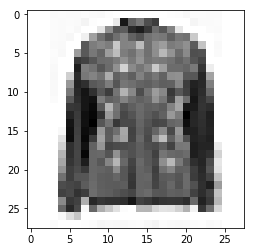

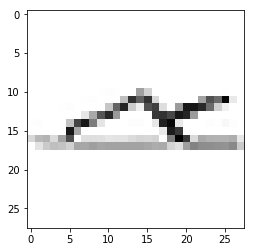

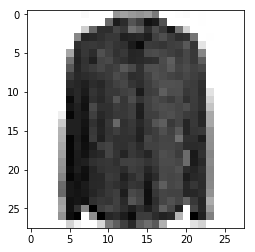

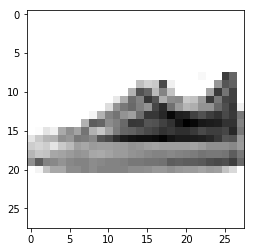

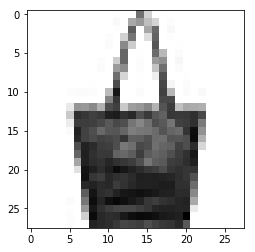

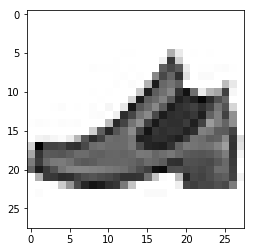

In [336]:
for i in range(len(label_examples)):
    plt.imshow(label_examples.iloc[i].values.reshape(28, 28),cmap='binary')
    plt.figure()

---

Create a validation set

In [417]:
# modify y_train to expected format (one-hot)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train)

In [418]:
print('X_train shape: {}, y_train shape: {}'.format(X_train.shape,y_train.shape))

X_train shape: (45000, 784), y_train shape: (45000, 10)


### Single Layer NN

---

    1 hidden layer:
        30 neurons
    solver:
        stocastic gradient decent using default learning rate
    activation: 
        relu activation
    batch size
        128 images
    

In [419]:
# construct
model_1 = Sequential()
model_1.add(BatchNormalization(axis=1,input_shape=(784,)))
model_1.add(Dense(20,activation='relu',kernel_initializer='he_uniform'))
model_1.add(Dense(10,activation='softmax'))

In [420]:
# compile
opt = Adam()
model_1.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [421]:
# train
history_1 = model_1.fit(X_train, y_train, batch_size=128, epochs=10, 
          verbose=True, validation_data=(X_valid, y_valid))

Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 2s - loss: 0.6397 - acc: 0.7830 - val_loss: 0.4570 - val_acc: 0.8387
Epoch 2/10
45000/45000 [==============================] - 2s - loss: 0.4303 - acc: 0.8477 - val_loss: 0.4219 - val_acc: 0.8539
Epoch 3/10
45000/45000 [==============================] - 2s - loss: 0.3930 - acc: 0.8594 - val_loss: 0.4035 - val_acc: 0.8573
Epoch 4/10
45000/45000 [==============================] - 2s - loss: 0.3709 - acc: 0.8665 - val_loss: 0.3862 - val_acc: 0.8637
Epoch 5/10
45000/45000 [==============================] - 2s - loss: 0.3565 - acc: 0.8707 - val_loss: 0.3846 - val_acc: 0.8648
Epoch 6/10
45000/45000 [==============================] - 2s - loss: 0.3423 - acc: 0.8769 - val_loss: 0.3748 - val_acc: 0.8696
Epoch 7/10
45000/45000 [==============================] - 2s - loss: 0.3322 - acc: 0.8798 - val_loss: 0.3727 - val_acc: 0.8714
Epoch 8/10
45000/45000 [==============================] - 2s 

### Rule of thumb for training NNs:

Push your model's architecture to overfit perhaps even to the point of memorization - then address the overfitting by regularization or other means.

That means we should get more complex in our architecture

In [395]:
def mod_plot(history,name):
    epochs_acc = pd.DataFrame([history.history['acc'],history.history['val_acc']])
    epochs_acc = epochs_acc.T
    epochs_acc.columns = ['train acc','val acc']
    ax = epochs_acc.plot(title='{}'.format(name))
    ax.set_xlabel('epochs')
    ax.set_ylabel('validation acc')

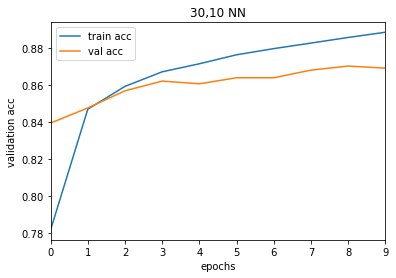

In [396]:
mod_plot(history_1,'20,10 NN')

In [397]:
def mod_score(model,X_test=X_test,y_test=y_test):
    score = model.evaluate(X_test, y_test, verbose=False)
    print('\tModel Summary:')
    model.summary()
    print(('\n\tModel Test Score: {}').format(score[1]))
    return

In [422]:
mod_score(model_1)

	Model Summary:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_105 (Bat (None, 784)               3136      
_________________________________________________________________
dense_156 (Dense)            (None, 20)                15700     
_________________________________________________________________
dense_157 (Dense)            (None, 10)                210       
Total params: 19,046
Trainable params: 17,478
Non-trainable params: 1,568
_________________________________________________________________

	Model Test Score: 0.8695


### Evaluation: Score - 87%

We've got a working model, and its not great. Better than a baseline guess of 10% however! The github page has a number of benchmarked models - most are within upper 80s lower 90s. The highest is ~96% which included using image transformations to upsample the data.

Lets see if other architectures and modifications to our hyperparameters can help boost our score.

### Single Layer NN

---

    1 hidden layer:
        512 neurons
    activation:
        relu
    random initialization:
        he_normal
    

In [423]:
model_2 = Sequential()
model_2.add(BatchNormalization(input_shape=(784,)))
model_2.add(Dense(512, 
                activation='relu', 
                kernel_initializer='he_uniform',
               ))
model_2.add(Dense(10, 
                activation='softmax'))

opt = Adam(lr=.001)

model_2.compile(loss='categorical_crossentropy', optimizer=opt, 
              metrics=['accuracy'])
              
history_2 = model_2.fit(X_train, y_train, batch_size=128, 
                            epochs=10, verbose=1, validation_data=(X_valid, y_valid))

Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 4s - loss: 0.4889 - acc: 0.8300 - val_loss: 0.4060 - val_acc: 0.8585
Epoch 2/10
45000/45000 [==============================] - 4s - loss: 0.3442 - acc: 0.8747 - val_loss: 0.3511 - val_acc: 0.8755
Epoch 3/10
45000/45000 [==============================] - 4s - loss: 0.2952 - acc: 0.8923 - val_loss: 0.3624 - val_acc: 0.8743
Epoch 4/10
45000/45000 [==============================] - 4s - loss: 0.2655 - acc: 0.9018 - val_loss: 0.3373 - val_acc: 0.8812
Epoch 5/10
45000/45000 [==============================] - 4s - loss: 0.2450 - acc: 0.9103 - val_loss: 0.3623 - val_acc: 0.8781
Epoch 6/10
45000/45000 [==============================] - 4s - loss: 0.2208 - acc: 0.9176 - val_loss: 0.3438 - val_acc: 0.8823
Epoch 7/10
45000/45000 [==============================] - 4s - loss: 0.1989 - acc: 0.9256 - val_loss: 0.3560 - val_acc: 0.8819
Epoch 8/10
45000/45000 [==============================] - 4s 

In [401]:
mod_score(model_2)

	Model Summary:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_99 (Batc (None, 784)               3136      
_________________________________________________________________
dense_135 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_136 (Dense)            (None, 10)                5130      
Total params: 410,186
Trainable params: 408,618
Non-trainable params: 1,568
_________________________________________________________________

	Model Test Score: 0.8943


### Clear we are now overfitting - which is a good thing! 

Without overfitting we cannot be confident our model's architecture has the ability to learn our data effectively. But now we need to do something to control the overfitting.

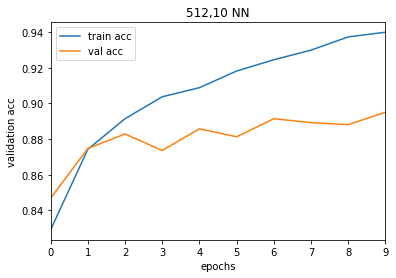

In [402]:
mod_plot(history_2,'512,10 NN')

### Multi-Layer NN 

Add another layer and use dropout to regularize it. This is adding a couple new components to the model at the same time for the sake of making the notebook susinct. The truth is there is only so far you can go with vanilla NNs when dealing with images!
    
    2 hidden layer:
        512 neurons
        512 neurons
    activation:
        relu
    random initialization:
        he_normal
    batch_normalization:
        every step (this should speed up computer time and also offer some regularization as well, so it should really always be used)

In [424]:
model_3 = Sequential()
model_3.add(BatchNormalization(input_shape=(784,)))
model_3.add(Dense(512, 
                activation='relu',
                kernel_initializer='he_uniform',
                #kernel_regularizer=regularizers.l2(0.01),
               ))
model_3.add(BatchNormalization())
model_3.add(Dropout(.1))
model_3.add(Dense(512, 
                activation='relu', 
                kernel_initializer='he_uniform',
                #kernel_regularizer=regularizers.l2(0.01),
               ))
model_3.add(BatchNormalization())
model_3.add(Dropout(.3))
model_3.add(Dense(10, 
                activation='softmax'))

model_3.compile(loss='categorical_crossentropy', optimizer=opt,#SGD(lr=.1), 
              metrics=['accuracy'])
              
history_3 = model_3.fit(X_train, y_train, batch_size=128, 
                            epochs=15, verbose=1, validation_data=(X_valid, y_valid))

Train on 45000 samples, validate on 15000 samples
Epoch 1/15
45000/45000 [==============================] - 11s - loss: 0.5281 - acc: 0.8143 - val_loss: 0.3918 - val_acc: 0.8555
Epoch 2/15
45000/45000 [==============================] - 11s - loss: 0.3714 - acc: 0.8629 - val_loss: 0.3595 - val_acc: 0.8711
Epoch 3/15
45000/45000 [==============================] - 11s - loss: 0.3276 - acc: 0.8788 - val_loss: 0.3376 - val_acc: 0.8781
Epoch 4/15
45000/45000 [==============================] - 11s - loss: 0.2981 - acc: 0.8911 - val_loss: 0.3172 - val_acc: 0.8857
Epoch 5/15
45000/45000 [==============================] - 11s - loss: 0.2749 - acc: 0.8976 - val_loss: 0.3154 - val_acc: 0.8854
Epoch 6/15
45000/45000 [==============================] - 11s - loss: 0.2538 - acc: 0.9048 - val_loss: 0.3175 - val_acc: 0.8879
Epoch 7/15
45000/45000 [==============================] - 11s - loss: 0.2416 - acc: 0.9099 - val_loss: 0.3064 - val_acc: 0.8912
Epoch 8/15
45000/45000 [==============================

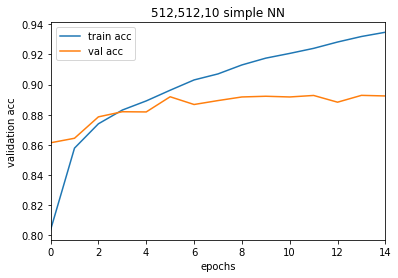

In [404]:
mod_plot(history_3,'512,512,10 simple NN')

In [405]:
mod_score(model_3)

	Model Summary:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_102 (Bat (None, 784)               3136      
_________________________________________________________________
dense_141 (Dense)            (None, 512)               401920    
_________________________________________________________________
batch_normalization_103 (Bat (None, 512)               2048      
_________________________________________________________________
dropout_54 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_142 (Dense)            (None, 512)               262656    
_________________________________________________________________
batch_normalization_104 (Bat (None, 512)               2048      
_________________________________________________________________
dropout_55 (Dropout)         (None, 512)               0    

### ConvNet Inspired by VGG

---

Since Mnist data is naturally in image format, the best machine learning model suited is called a convolutional neural net. This type of architecture takes advantage of the spatial relationship of the datapoints. 

Conv filters or kernels are a select set of NN layers that slide across the entire image. They're both inspired/found in nature and the outcomes such as edge detector kernels were hand crafted at one point too! Laplace Filter!
    1. They have a specified size, usually 3x3, and slide across the image. It is currently recommended to stack many 3x3 filters on top of one another.
    2. A single filter's weights are updated only after sliding across an entire image. This means they're somewhat spatially invariant.
    3. Stacked, they gerenally build upon each other to create higher level concepts. There is a great youtube video of them being visualized: https://www.youtube.com/watch?v=AgkfIQ4IGaM

To use them however, the data has to be formatted in the same way an image would be instead of a long vector.    

In [456]:
train = pd.read_csv('../../fashionmnist/fashion-mnist_train.csv')
test = pd.read_csv('../../fashionmnist/fashion-mnist_test.csv')

In [457]:
X_train_conv = np.array(train.drop('label',axis=1)).reshape(60000,28,28,1)
y_train_conv = np.array(train['label'])
X_test_conv = np.array(test.drop('label',axis=1)).reshape(10000,28,28,1)
y_test_conv = np.array(test['label'])

In [458]:
X_train_conv, X_valid_conv, y_train_conv, y_valid_conv = train_test_split(X_train_conv, y_train_conv)

In [459]:
X_train_conv.shape

(45000, 28, 28, 1)

In [460]:
X_test_conv.shape

(10000, 28, 28, 1)

In [461]:
y_train_conv = to_categorical(y_train_conv,10)
y_valid_conv = to_categorical(y_valid_conv,10)
y_test_conv = to_categorical(y_test_conv,10)

In [462]:
y_train_conv.shape

(45000, 10)

In [463]:
X_valid_conv.shape

(15000, 28, 28, 1)

In [466]:
def create_conv_model(pool=(2,2),do=.5):
    model = Sequential()
    model.add(BatchNormalization(axis=1,input_shape=(img_cols,img_rows,1)))
    model.add(Conv2D(32,kernel_size=(3,3),
                     activation='relu', 
                     padding='same',
                     kernel_initializer='he_normal'))
    model.add(BatchNormalization(axis=1))
    model.add(MaxPooling2D(pool_size=pool))
    model.add(Conv2D(32,(3,3), 
                     padding='same',
                     activation='relu',
                     kernel_initializer='he_normal'))
    model.add(BatchNormalization(axis=1))
    model.add(MaxPooling2D(pool_size=pool))
    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Dropout(do))
    model.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(10, activation='softmax', kernel_initializer='he_normal'))

    opt = Adam(lr=.001)

    model.compile(optimizer=opt, 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

### Conv NN

Maxpooling: 2,2
Dropout: .5

In [465]:
model = create_conv_model()
history_4 = model.fit(X_train_conv, y_train_conv, 
                    batch_size=128, 
                    epochs=1, 
                    verbose=True, 
                    validation_data=(X_valid_conv, y_valid_conv))

Train on 45000 samples, validate on 15000 samples
Epoch 1/1
45000/45000 [==============================] - 209s - loss: 0.5442 - acc: 0.8240 - val_loss: 0.3345 - val_acc: 0.8833


---
You can see our model here has got a little bit too much regularization - probably from the dropout(.5) because its performing far better on the validation set than the training set. I'll loosen that up and possibly change the maxpooling to 3x3 to speed up the training.

In [468]:
model = create_conv_model(do=.3)
history_5 = model.fit(X_train_conv, y_train_conv, 
                    batch_size=128, 
                    epochs=1, 
                    verbose=True, 
                    validation_data=(X_valid_conv, y_valid_conv))

Train on 45000 samples, validate on 15000 samples
Epoch 1/1
45000/45000 [==============================] - 211s - loss: 0.4835 - acc: 0.8409 - val_loss: 0.3135 - val_acc: 0.8898


---
These could also benefit from additional conv layers - but in the interest of time I'm going to run them a few epochs to compare to the simple networks above.

In [469]:
model = create_conv_model(do=.2)
history_6 = model.fit(X_train_conv, y_train_conv, 
                    batch_size=128, 
                    epochs=5, 
                    verbose=True, 
                    validation_data=(X_valid_conv, y_valid_conv))

Train on 45000 samples, validate on 15000 samples
Epoch 1/5
45000/45000 [==============================] - 211s - loss: 0.4449 - acc: 0.8505 - val_loss: 0.3343 - val_acc: 0.8827
Epoch 2/5
45000/45000 [==============================] - 208s - loss: 0.2848 - acc: 0.8982 - val_loss: 0.2630 - val_acc: 0.9050
Epoch 3/5
45000/45000 [==============================] - 212s - loss: 0.2220 - acc: 0.9181 - val_loss: 0.2610 - val_acc: 0.9105
Epoch 4/5
45000/45000 [==============================] - 214s - loss: 0.1890 - acc: 0.9298 - val_loss: 0.2691 - val_acc: 0.9035
Epoch 5/5
45000/45000 [==============================] - 210s - loss: 0.1604 - acc: 0.9397 - val_loss: 0.2597 - val_acc: 0.9135


In [285]:
conv = sample_comparison(create_conv_model, X_train_conv, y_train_conv)

In [291]:
conv.set_sample_sizes([500,10000,45000])

In [298]:
conv.X_train_inds[500].shape

(500, 28, 28, 1)

In [300]:
conv.train(X_valid_conv[:5000],y_valid_conv[:5000])

Train on 500 samples, validate on 5000 samples
Epoch 1/10
500/500 [==============================] - 73s - loss: 4.7978 - acc: 0.5060 - val_loss: 1.5135 - val_acc: 0.6542
Epoch 2/10
500/500 [==============================] - 72s - loss: 2.7960 - acc: 0.8100 - val_loss: 1.6317 - val_acc: 0.4452
Epoch 3/10
500/500 [==============================] - 72s - loss: 2.9128 - acc: 0.8000 - val_loss: 1.7590 - val_acc: 0.3046
Epoch 4/10
500/500 [==============================] - 72s - loss: 2.3827 - acc: 0.8440 - val_loss: 2.1571 - val_acc: 0.3118
Epoch 5/10
500/500 [==============================] - 72s - loss: 2.0661 - acc: 0.8700 - val_loss: 3.2403 - val_acc: 0.2418
Epoch 6/10
500/500 [==============================] - 72s - loss: 2.0887 - acc: 0.8660 - val_loss: 4.8178 - val_acc: 0.1956
Epoch 7/10
500/500 [==============================] - 72s - loss: 1.9704 - acc: 0.8740 - val_loss: 6.5842 - val_acc: 0.1666
Epoch 8/10
500/500 [==============================] - 72s - loss: 1.8896 - acc: 0.878

KeyboardInterrupt: 

In [287]:
conv.score(X_test_conv, y_test_conv)

conv.plot_acc()

Train on 500 samples, validate on 15000 samples
Epoch 1/10
500/500 [==============================] - 190s - loss: 3.7519 - acc: 0.5480 - val_loss: 1.4680 - val_acc: 0.5909
Epoch 2/10
500/500 [==============================] - 189s - loss: 2.3973 - acc: 0.8360 - val_loss: 1.2930 - val_acc: 0.5701
Epoch 3/10
500/500 [==============================] - 188s - loss: 1.9843 - acc: 0.8640 - val_loss: 1.7749 - val_acc: 0.4423
Epoch 4/10
500/500 [==============================] - 188s - loss: 1.8687 - acc: 0.8740 - val_loss: 2.5985 - val_acc: 0.3695
Epoch 5/10
500/500 [==============================] - 189s - loss: 1.7762 - acc: 0.8840 - val_loss: 3.4514 - val_acc: 0.3345
Epoch 6/10
500/500 [==============================] - 189s - loss: 1.7372 - acc: 0.8840 - val_loss: 4.6012 - val_acc: 0.2953
Epoch 7/10


KeyboardInterrupt: 

---

## Examine the affect of sample size on accuracy

1. Build subsampled datasets from the train data
2. Train the same architecture model on each dataset
3. Compare the val_acc

In [170]:
inds = {}
#for size in [500,1000,2500,5000,7500,10000,15000,20000,25000,35000,45000]:
for size in [500,1000,5000,10000,25000,45000]:
    inds[size] = np.random.choice(len(X_train),size)

In [171]:
X_train_inds = {}
y_train_inds = {}
for size in inds.keys():
    X_train_inds[size] = []
    y_train_inds[size] = []
    for ind in inds[size]:
        X_train_inds[size].append(X_train[ind])
        y_train_inds[size].append(y_train[ind])
    X_train_inds[size] = np.array(X_train_inds[size])
    y_train_inds[size] = np.array(y_train_inds[size])

In [148]:
for sample_size in inds.keys():
    print(X_train_inds[sample_size].shape)
    print(y_train_inds[sample_size].shape)

(500, 784)
(500, 10)
(1000, 784)
(1000, 10)
(5000, 784)
(5000, 10)
(10000, 784)
(10000, 10)
(25000, 784)
(25000, 10)
(45000, 784)
(45000, 10)


Using the architecture from above, lets train 6 models on each set of data and see how their performace curves compare

In [146]:
def create_model():    
    model = Sequential()
    model.add(BatchNormalization(input_shape=(784,)))
    model.add(Dense(512, 
                    activation='relu',
                    kernel_initializer='he_uniform',
                    #kernel_regularizer=regularizers.l2(0.01),
                   ))
    model.add(BatchNormalization())
    model.add(Dropout(.1))
    model.add(Dense(512, 
                    activation='relu', 
                    kernel_initializer='he_uniform',
                    #kernel_regularizer=regularizers.l2(0.01),
                   ))
    model.add(BatchNormalization())
    model.add(Dropout(.5))
    model.add(Dense(10, 
                    activation='softmax'))

    opt = Adam(lr=.001)

    model.compile(loss='categorical_crossentropy', optimizer=opt,#SGD(lr=.1), 
                  metrics=['accuracy'])
    return model

In [149]:
sample_history = {}
sample_model = {}
for sample_size in inds.keys():
    # create fresh model
    model = create_model()
    
    # set new train/test data
    X_train = X_train_inds[sample_size]
    y_train = y_train_inds[sample_size]
    
    # save model history
    sample_history[sample_size] = model.fit(X_train, y_train, batch_size=128, 
                            epochs=10, verbose=1, validation_data=(X_valid, y_valid))
    # save model weights
    sample_model[sample_size] = model

Train on 500 samples, validate on 15000 samples
Epoch 1/10
500/500 [==============================] - 1s - loss: 2.5859 - acc: 0.2760 - val_loss: 1.7779 - val_acc: 0.3504
Epoch 2/10
500/500 [==============================] - 1s - loss: 0.8872 - acc: 0.7020 - val_loss: 1.5003 - val_acc: 0.4684
Epoch 3/10
500/500 [==============================] - 1s - loss: 0.3614 - acc: 0.8880 - val_loss: 1.3419 - val_acc: 0.5292
Epoch 4/10
500/500 [==============================] - 1s - loss: 0.2192 - acc: 0.9280 - val_loss: 1.2499 - val_acc: 0.5599
Epoch 5/10
500/500 [==============================] - 1s - loss: 0.1526 - acc: 0.9500 - val_loss: 1.1685 - val_acc: 0.5981
Epoch 6/10
500/500 [==============================] - 1s - loss: 0.1109 - acc: 0.9780 - val_loss: 1.0955 - val_acc: 0.6477
Epoch 7/10
500/500 [==============================] - 1s - loss: 0.0577 - acc: 0.9880 - val_loss: 1.0249 - val_acc: 0.7003
Epoch 8/10
500/500 [==============================] - 1s - loss: 0.0478 - acc: 0.9900 - val

In [152]:
sample_model_score = {}
for sample_size in inds.keys():
    sample_model_score[sample_size] = sample_model[sample_size].evaluate(X_test, y_test, verbose=False)[1]

In [158]:
sample_model_score

{500: 0.78239999999999998,
 1000: 0.8841,
 5000: 0.93989999999999996,
 10000: 0.95930000000000004,
 25000: 0.96899999999999997,
 45000: 0.97360000000000002}

(0.7, 1)

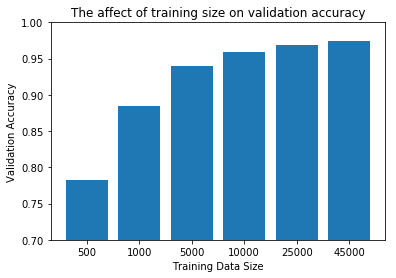

In [167]:
plt.bar(range(len(sample_model_score)), sample_model_score.values(), align='center')
plt.xticks(range(len(sample_model_score)), sample_model_score.keys())
plt.title('The affect of training size on validation accuracy')
plt.xlabel('Training Data Size')
plt.ylabel('Validation Accuracy')
plt.ylim((.7,1))

Lets take a look at the training vs validation accuracies in the history as well

In [188]:
def mod_plot(history,name):
    epochs_acc = pd.DataFrame([history.history['acc'],history.history['val_acc']])
    epochs_acc = epochs_acc.T
    epochs_acc.columns = ['train acc','val acc']
    ax = epochs_acc.plot(title='{}'.format(name))
    ax.set_xlabel('epochs')
    ax.set_ylabel('validation acc')
    plt.ylim((0.2,1))

## Training size highly affects the model's ability to learn

There are a few things that jump out at me when looking at the results.

1. As expected training size drastically affects the model's performance
2. The larger the training size, the quicker the validation accuracy is to level off. At 500 training samples the model is still learning at epoch 10 while once you get to 10k or 25k the accuracy levels off at the 1-3rd epochs
3. 

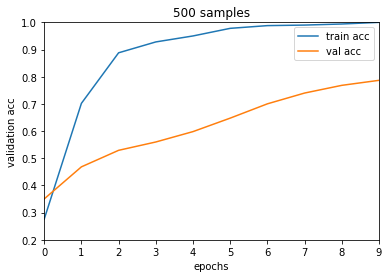

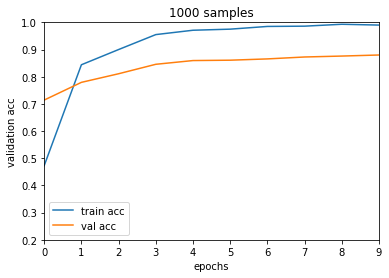

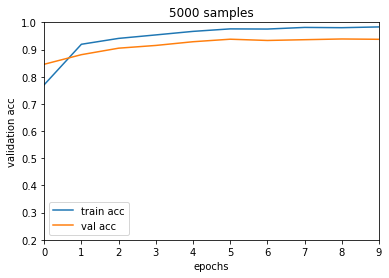

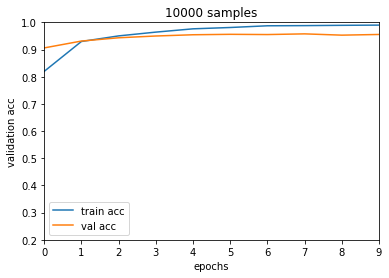

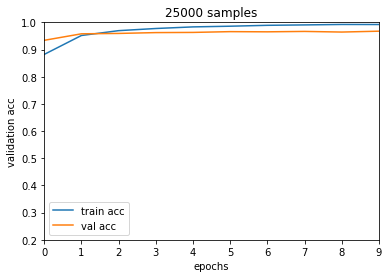

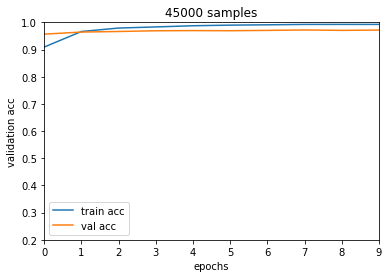

In [190]:
for sample_size in inds.keys():
    mod_plot(sample_history[sample_size],'{} samples'.format(sample_size))

## Create a wrapper to make it easier to experiment

In [268]:
def create_simple():
    model_1 = Sequential()
    model_1.add(Dense(30,activation='relu',input_shape=(784,)))
    model_1.add(Dense(10,activation='softmax'))
    opt = Adam(lr=.001)
    model_1.compile(loss='categorical_crossentropy', optimizer=opt,#SGD(lr=.1), 
                  metrics=['accuracy'])
    return model_1

In [275]:
class sample_comparison(object):
    '''Compare model performance based on different training subsamples. 
    
    Attributes:
        sample_history: A dict tracking the model training/val accuracy per epoch
        sample_model: A dict containing the trained model
        
    Methods:
    
    '''
    
    def __init__(self, model_func, X_train, y_train):
        self.model_func = model_func
        self.X_train = X_train
        self.y_train = y_train
        
        
    def set_sample_sizes(self, sample_sizes):
        self.inds = {}
        for sample_size in sample_sizes:
            self.inds[sample_size] = np.random.choice(len(self.X_train),sample_size)
        
        self.X_train_inds = {}
        self.y_train_inds = {}
        for size in self.inds.keys():
            self.X_train_inds[size] = []
            self.y_train_inds[size] = []
            for ind in self.inds[size]:
                self.X_train_inds[size].append(self.X_train[ind])
                self.y_train_inds[size].append(self.y_train[ind])
            self.X_train_inds[size] = np.array(self.X_train_inds[size])
            self.y_train_inds[size] = np.array(self.y_train_inds[size])
            
    def train(self, X_valid, y_valid, verbose=True, epochs=10):
        self.sample_history = {}
        self.sample_model = {}
        for sample_size in self.inds.keys():
            self.model = self.model_func()
            
            # set new train/test data
            X_train = self.X_train_inds[sample_size]
            y_train = self.y_train_inds[sample_size]

            # save model history
            self.sample_history[sample_size] = self.model.fit(X_train, y_train, batch_size=128, 
                                    epochs=epochs, verbose=verbose, validation_data=(X_valid, y_valid))
            # save model weights
            self.sample_model[sample_size] = self.model
            
    def score(self, X_test, y_test):
        self.X_test = X_test
        self.y_test = y_test
        
        self.sample_model_score = {}
        for sample_size in self.inds.keys():
            self.sample_model_score[sample_size] = self.sample_model[sample_size].evaluate(self.X_test, self.y_test, verbose=False)[1]
        
        plt.bar(range(len(self.sample_model_score)), self.sample_model_score.values(), align='center')
        plt.xticks(range(len(self.sample_model_score)), self.sample_model_score.keys())
        plt.title('The affect of training size on validation accuracy')
        plt.xlabel('Training Data Size')
        plt.ylabel('Validation Accuracy')
        plt.ylim((.6,1))
        
    def plot_acc(self,mod_plot=mod_plot):
        self.mod_plot = mod_plot
        for sample_size in self.inds.keys():
            self.mod_plot(self.sample_history[sample_size],'{} samples'.format(sample_size))

Train on 500 samples, validate on 15000 samples
Epoch 1/10
500/500 [==============================] - 0s - loss: 13.5519 - acc: 0.1420 - val_loss: 13.0436 - val_acc: 0.1805
Epoch 2/10
500/500 [==============================] - 0s - loss: 12.6844 - acc: 0.2080 - val_loss: 12.3994 - val_acc: 0.2237
Epoch 3/10
500/500 [==============================] - 0s - loss: 11.9836 - acc: 0.2540 - val_loss: 12.6494 - val_acc: 0.2094
Epoch 4/10
500/500 [==============================] - 0s - loss: 11.8407 - acc: 0.2580 - val_loss: 11.7826 - val_acc: 0.2610
Epoch 5/10
500/500 [==============================] - 0s - loss: 10.6447 - acc: 0.3320 - val_loss: 11.1396 - val_acc: 0.3041
Epoch 6/10
500/500 [==============================] - 0s - loss: 10.5899 - acc: 0.3400 - val_loss: 11.1579 - val_acc: 0.3022
Epoch 7/10
500/500 [==============================] - 0s - loss: 10.4548 - acc: 0.3440 - val_loss: 10.4461 - val_acc: 0.3466
Epoch 8/10
500/500 [==============================] - 0s - loss: 9.9079 - acc

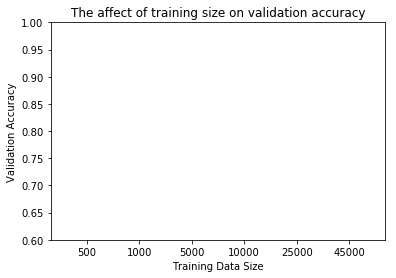

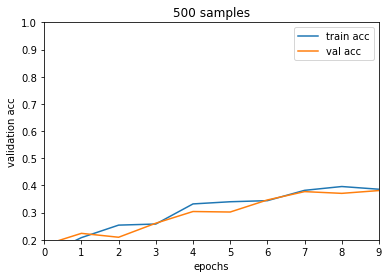

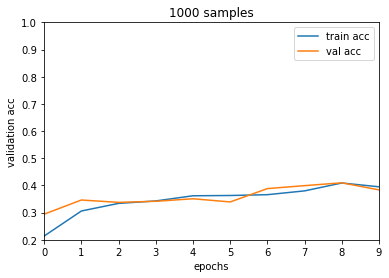

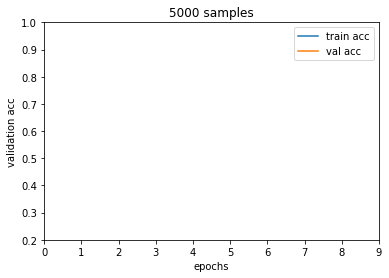

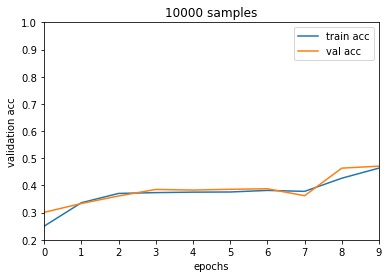

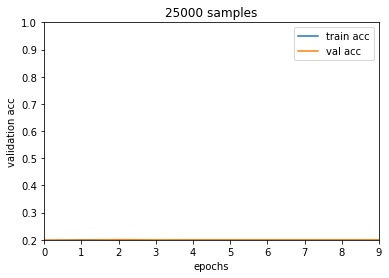

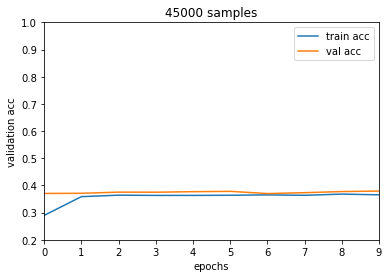

In [406]:
simple = sample_comparison(create_simple,X_train,y_train)
simple.set_sample_sizes([500,1000,5000,10000,25000,45000])
simple.train(X_valid,y_valid)
simple.score(X_test, y_test)
simple.plot_acc()

In [ ]:

'''Trains a simple convnet on the Zalando MNIST dataset.
Gets to 81.03% test accuracy after 30 epochs
(there is still a lot of margin for parameter tuning).
3 seconds per epoch on a GeForce GTX 980 GPU with CuDNN 5.
'''

from __future__ import print_function
import numpy as np
#from mnist import MNIST
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 30

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
#mndata = MNIST(path='data/', )
# x_train, y_train = mndata.load_training()
# x_test, y_test = mndata.load_testing()

from keras.datasets import mnist
train, test = mnist.load_data()

x_train = np.array(train[0])
y_train = np.array(train[1])
x_test = np.array(test[0])
y_test = np.array(test[1])

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Nadam(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Original Mnist

In [305]:
import keras.backend as K
from keras.datasets import mnist
train, test = mnist.load_data()

x_train = np.array(train[0])
y_train = np.array(train[1])
x_test = np.array(test[0])
y_test = np.array(test[1])

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [306]:
norm_mean = x_train.mean().astype(np.float32)
norm_std = x_train.std().astype(np.float32)

def norm(x):
    return (x-norm_mean)/norm_std

In [307]:
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

In [308]:
from keras.layers import Lambda

In [309]:
model = Sequential()
model.add(BatchNormalization(axis=1,input_shape=(28,28,1)))
#model.add(Lambda(norm, input_shape=(28,28,1)))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [310]:
model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [311]:
model.fit(x_train,y_train,batch_size=128,epochs=1)

Epoch 1/1
12416/60000 [=====>........................] - ETA: 62s - loss: 0.5077 - acc: 0.8426

KeyboardInterrupt: 

In [813]:
model.optimizer.lr = .1
model.fit(x_train,y_train,batch_size=128,epochs=1,validation_data=[x_test,y_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 81s - loss: 0.0439 - acc: 0.9865 - val_loss: 0.0381 - val_acc: 0.9867


In [814]:
model.optimizer.lr = .01
model.fit(x_train,y_train,batch_size=128,epochs=1,validation_data=[x_test,y_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 82s - loss: 0.0291 - acc: 0.9915 - val_loss: 0.0289 - val_acc: 0.9909


In [815]:
model.optimizer.lr = .001
model.fit(x_train,y_train,batch_size=128,epochs=3,validation_data=[x_test,y_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 85s - loss: 0.0223 - acc: 0.9928 - val_loss: 0.0257 - val_acc: 0.9923
Epoch 2/3
60000/60000 [==============================] - 83s - loss: 0.0187 - acc: 0.9943 - val_loss: 0.0231 - val_acc: 0.9929
Epoch 3/3
60000/60000 [==============================] - 83s - loss: 0.0146 - acc: 0.9954 - val_loss: 0.0258 - val_acc: 0.9919


In [834]:
num_epochs = {'lrs':[0.0001,0.00001],
              'epochs':[1,1]}

In [835]:
def train_rounds(model,num_epochs):
    model.compile(Adam(), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    
    lrs = num_epochs['lrs']
    epochs = num_epochs['epochs']
    zipped = zip(lrs,epochs)
    
    for lr, epoch in zipped:
        print('\nperforming {} epoch(s) at {} learning rate\n'.format(epoch,lr))
        
        model.optimizer.lr = lr

        model.fit(x_train,
                  y_train,
                  batch_size=128,
                  epochs=epoch,
                  validation_data=[x_test,y_test])
    return model

In [836]:
model = train_rounds(model,num_epochs)


performing 1 epoch(s) at 0.0001 learning rate



INFO (theano.gof.compilelock): Refreshing lock /Users/xbno/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-3.6.1-64/lock_dir/lock


Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 77s - loss: 0.0037 - acc: 0.9988 - val_loss: 0.0189 - val_acc: 0.9943

performing 1 epoch(s) at 1e-05 learning rate

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 77s - loss: 0.0014 - acc: 0.9998 - val_loss: 0.0213 - val_acc: 0.9945


## Data Augmentation

Rule of thumb:
    
    data augmentation never hurts in image processing and is the first step to take when reducing overfitting in a convnet
    
Confirm the augmented data is a reasonable representation of the input data. 
    
    what are the best values to start the hyperparameters at?
        I played around with the values and eyeballed the data being produced and came to the conclusion that .15 is far to high. .1 seems better. and .07 seems better still. This is judged on the ability for the network to learn back to the level of the previous accuracy without data augmentation
    

In [838]:
from keras.preprocessing import image

In [866]:
# only train needs to be augmented, the validation set does not
batch_size = 128

data_aug = image.ImageDataGenerator(rotation_range=10,
                                    width_shift_range=.07,
                                    shear_range=.3,
                                    height_shift_range=.07,
                                    zoom_range=.07)
data_gen = image.ImageDataGenerator()

batches = data_aug.flow(x_train,y_train,batch_size=batch_size)
test_batches = data_gen.flow(x_test,y_test,batch_size=batch_size*2)

In [846]:
batches_prev = data_aug.flow(x_train,y_train,batch_size=2)
imgs = next(batches_prev)
imgs[0].shape

(2, 28, 28, 1)

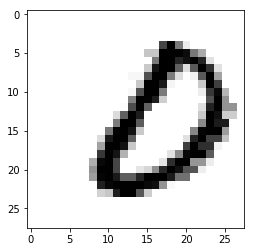

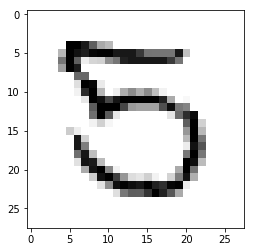

In [847]:
for i in range(len(imgs[0])):
    plt.imshow(imgs[0][i].reshape(28,28),cmap='binary')
    plt.figure()

In [858]:
model = Sequential()
model.add(Lambda(norm, input_shape=(28,28,1)))
model.add(Conv2D(16,(3,3),activation='elu'))
model.add(Conv2D(16,(3,3),activation='elu'))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),activation='elu'))
model.add(Conv2D(32,(3,3),activation='elu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(512, activation='elu'))
model.add(Dense(10, activation='softmax'))

/Users/xbno/anaconda/lib/python3.6/site-packages/keras/layers/core.py:629: UserWarning: `output_shape` argument not specified for layer lambda_23 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 28, 28, 1)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


In [ ]:
def train_rounds_gen(model,num_epochs):
    '''
    Trains a model with global variables batches and test_batches as generator input.
    
    
    '''
    model.compile(Adam(), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    
    lrs = num_epochs['lrs']
    epochs = num_epochs['epochs']
    zipped = zip(lrs,epochs)
    
    for lr, epoch in zipped:
        print('\nperforming {} epoch(s) at {} learning rate\n'.format(epoch,lr))
        
        model.optimizer.lr = lr

        model.fit_generator(batches,
                            batches.n//batches.batch_size,
                            epochs=epoch,
                            validation_data=test_batches,
                            validation_steps=test_batches.n//test_batches.batch_size)
    return model

In [864]:
num_epochs = {'lrs':[0.001,.1,0.001],
              'epochs':[1,1,1]}

In [865]:
model = train_rounds_gen(model,num_epochs)


performing 1 epoch(s) at 0.001 learning rate

Epoch 1/1
937/937 [==============================] - 113s - loss: 0.0840 - acc: 0.9750 - val_loss: 0.0273 - val_acc: 0.9910

performing 1 epoch(s) at 0.1 learning rate

Epoch 1/1
937/937 [==============================] - 114s - loss: 0.0670 - acc: 0.9800 - val_loss: 0.0241 - val_acc: 0.9915

performing 1 epoch(s) at 0.001 learning rate

Epoch 1/1
937/937 [==============================] - 114s - loss: 0.0642 - acc: 0.9811 - val_loss: 0.0294 - val_acc: 0.9914


## Try leaky vs relu activation

In [783]:
leakyrelu = keras.layers.advanced_activations.LeakyReLU(alpha=0.3)

In [784]:
model = Sequential()
model.add(Lambda(norm, input_shape=(28,28,1)))
model.add(Conv2D(16,(3,3),activation='linear'))
model.add(Activation(leakyrelu))
model.add(Conv2D(16,(3,3),activation='linear'))
model.add(Activation(leakyrelu))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),activation='linear'))
model.add(Activation(leakyrelu))
model.add(Conv2D(32,(3,3),activation='linear'))
model.add(Activation(leakyrelu))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(512, activation='linear'))
model.add(Activation(leakyrelu))
model.add(Dense(10, activation='softmax'))

/Users/xbno/anaconda/lib/python3.6/site-packages/keras/layers/core.py:629: UserWarning: `output_shape` argument not specified for layer lambda_17 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 28, 28, 1)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))
/Users/xbno/anaconda/lib/python3.6/site-packages/keras/activations.py:103: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  ).format(identifier=identifier.__class__.__name__))


## Add Batchnorm

In [868]:
model = Sequential()
model.add(Lambda(norm, input_shape=(28,28,1)))
model.add(Conv2D(16,(3,3),activation='elu'))
model.add(BatchNormalization(axis=1))
model.add(Conv2D(16,(3,3),activation='elu'))
model.add(MaxPooling2D())
model.add(BatchNormalization(axis=1))
model.add(Conv2D(32,(3,3),activation='elu'))
model.add(BatchNormalization(axis=1))
model.add(Conv2D(32,(3,3),activation='elu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512, activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(.5))
model.add(Dense(10, activation='softmax'))

/Users/xbno/anaconda/lib/python3.6/site-packages/keras/layers/core.py:629: UserWarning: `output_shape` argument not specified for layer lambda_24 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 28, 28, 1)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


In [869]:
# num_epochs = {'lrs':[0.001,.1,0.001,.0001],
#               'epochs':[1,1,2,3]}

num_epochs = {'lrs':[0.001,.1,0.001],
              'epochs':[1,1,1]}

In [870]:
train_rounds_gen(model,num_epochs)


performing 1 epoch(s) at 0.001 learning rate

Epoch 1/1
468/468 [==============================] - 198s - loss: 0.3232 - acc: 0.9042 - val_loss: 0.0516 - val_acc: 0.9833

performing 1 epoch(s) at 0.1 learning rate

Epoch 1/1
468/468 [==============================] - 201s - loss: 0.1214 - acc: 0.9616 - val_loss: 0.0301 - val_acc: 0.9898

performing 1 epoch(s) at 0.001 learning rate

Epoch 1/1
468/468 [==============================] - 200s - loss: 0.0886 - acc: 0.9720 - val_loss: 0.0306 - val_acc: 0.9900


# Ensemble

If I made an ensemble the same level as Jeremy:

In [881]:
epoch_time = 14 #200 - my computer time
num_of_epochs = 35
ensemble_of_models = 6

elapsed_time = epoch_time*num_of_epochs*ensemble_of_models

print('it would take ~{} minutes to run'.format(elapsed_time//60))

it would take ~49 minutes to run
